**Econ 353: Money, Banking and Financial Institutions**  

**Project 1 on Time-Series Analysis**  

We are using the monthly prices of Corn

Data source: https://fred.stlouisfed.org/series/PMAIZMTUSDMM



**<span style="color:red;">Objective of the Project:</span>**  

1) Upload a Time-series data set  
2) Visualize the data and report what you find - is there a trend or sesaonal component to it  
3) Check the stationarity of the data and report results  
4) If the data has trend and /or seasonality, decompose the data into trend and/or seasonal component 
5) Visualize the components of the data
6) If the data has trend then de-trend the data
7) If the data has seasonal component then de-seasonalize the data
8) Visualize the de-seasonalized /de-trended data
9) Check stationarity of de-trended data and report results. Make sure the series the stationary before further analysis
10) Forecast using ARIMA modelling
11) Visualize the Forecast

The Notebook below is divided into 11 sections above each section how to complete each analysis, respectively. 


**<span style="color:red;">Apart from completing the code and answering questions following the analysis highlighted in markdown at various places, please also answer the questions in the pdf file outline instructions for the Project</span>**  

**<span style="color:red;">install necessary libraries if not installed</span>**  

In [102]:
#pip install pmdarima

You need to import certain libraries in python whioch you will require for plotting

In [103]:
# Import necessary libraries
import pandas as pd #Pandas is a popular data manipulation and analysis library for the Python programming language. It provides data structures for efficiently storing, analysing and manipulating large datasets
import numpy as np #NumPy is a fundamental library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays
import matplotlib.pyplot as plt # This library is used for plotting
from statsmodels.tsa.stattools import adfuller # this is for ststitical tests like carrying out unit root test, among others
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima # this is for ARIMA forecasting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [104]:
# Load your time series data (replace 'your_data.csv' with your actual file or data source)
df =                     #LOAD THE CSV FILE. NAME OF THE FILE IS "Corn.csv" .complete the code

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Convert 'Value' to numeric format
#df['Prices'] = df['Prices'].str.replace(',', '').astype(int)

# Set 'Date' as the index
                                         # set date as index - complete the code

In [105]:
#print the dataframe

                Prices
Date                  
1990-01-01  105.900513
1990-02-01  106.294167
1990-03-01  109.837318
1990-04-01  118.498337
1990-05-01  121.254097
...                ...
2023-08-01  207.675889
2023-09-01  223.847666
2023-10-01  221.902519
2023-11-01  209.040297
2023-12-01  207.397969

[408 rows x 1 columns]


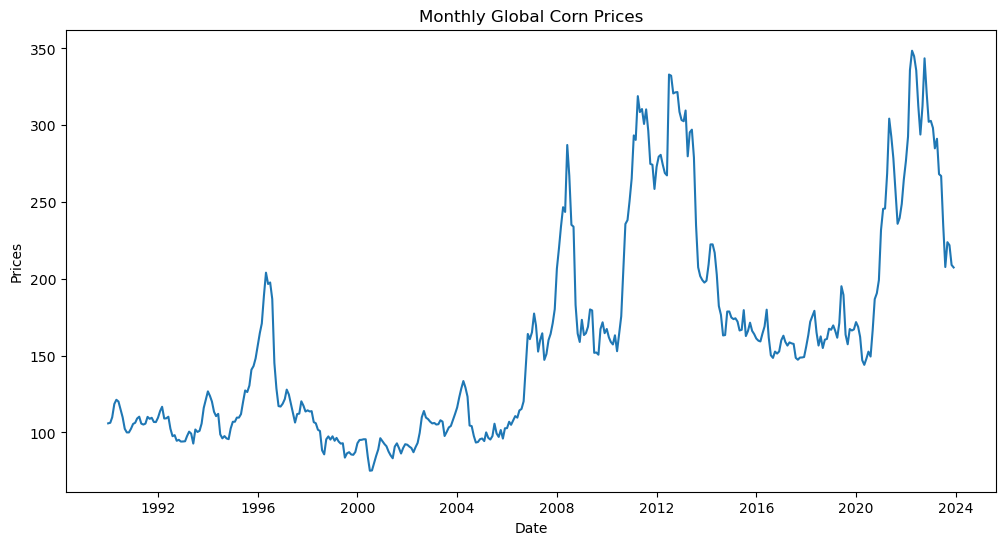

In [106]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
                                    #Complete the code for visualizing the series
plt.title('Monthly Global Corn Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.show()

Explain what you see in the series? Trend, seasonality or both and why?

The Augmented Dickey-Fuller (ADF) test is a statistical test for stationarity. The test produces an ADF statistic and a p-value. The null hypothesis of the test is that the time series has a unit root, which indicates non-stationarity. The alternative hypothesis is that the time series is stationary.

In [107]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
def stationarity_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Assuming df is your DataFrame


    
stationarity_test(df['Prices'])

ADF Statistic: -2.194688283382571
p-value: 0.20817894906001888
Critical Values: {'1%': -3.4471856790801514, '5%': -2.868960436182993, '10%': -2.5707229006220524}


Interpret the results that you get

The seasonal_decompose function in statsmodels allows you to decompose a time series into its trend, seasonal, and residual components. The period parameter represents the number of observations per seasonal cycle.

In my case, since the data appears to be monthly, we can set the period parameter to 12 because there are 12 months in a year. If our data has a different frequency, adjust the period accordingly.

In [108]:
# De-compose for trend, seasonality, and residual
decomposition = #Complete the code for decomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

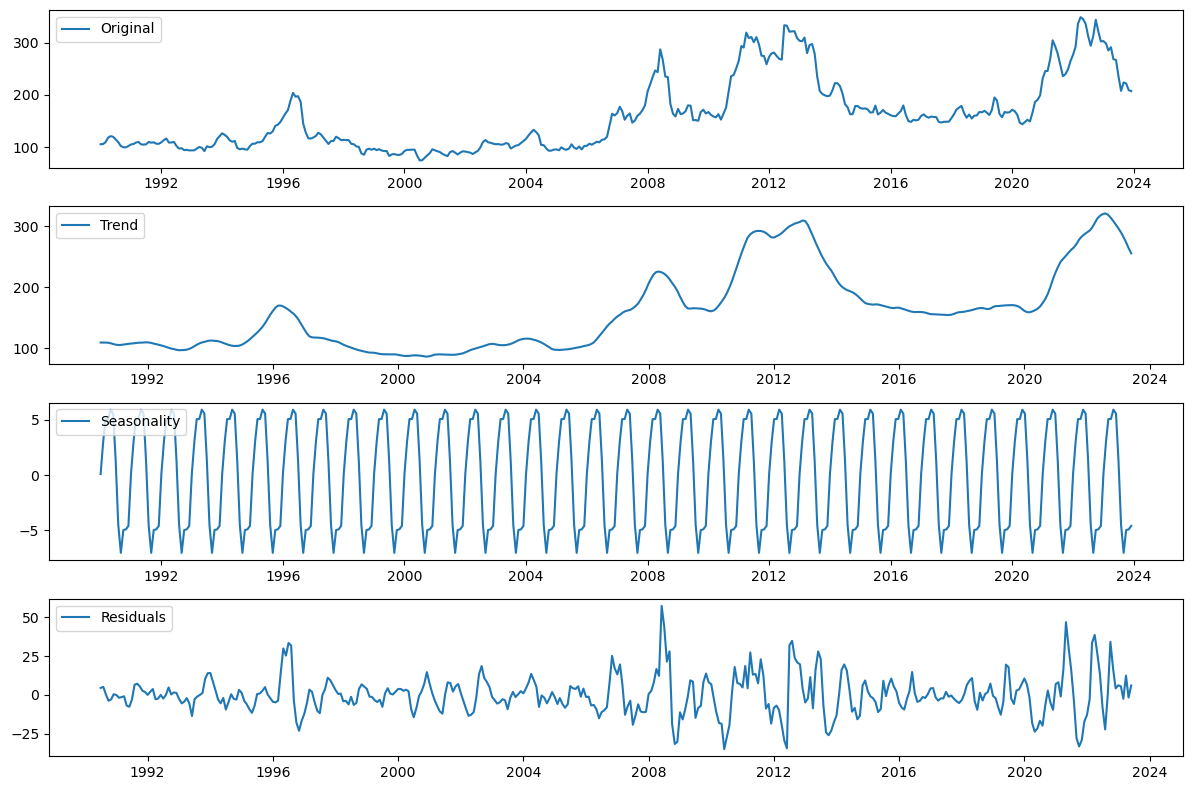

In [109]:
# Visualize components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Prices'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



In [110]:
# De-trend by subtracting trend
detrended =                   #Complete the code for creating detrended data




In [111]:
# De-seasonalize by subtracting seasonal component
deseasonalized =              #Complete the code for creating deseasonalized data




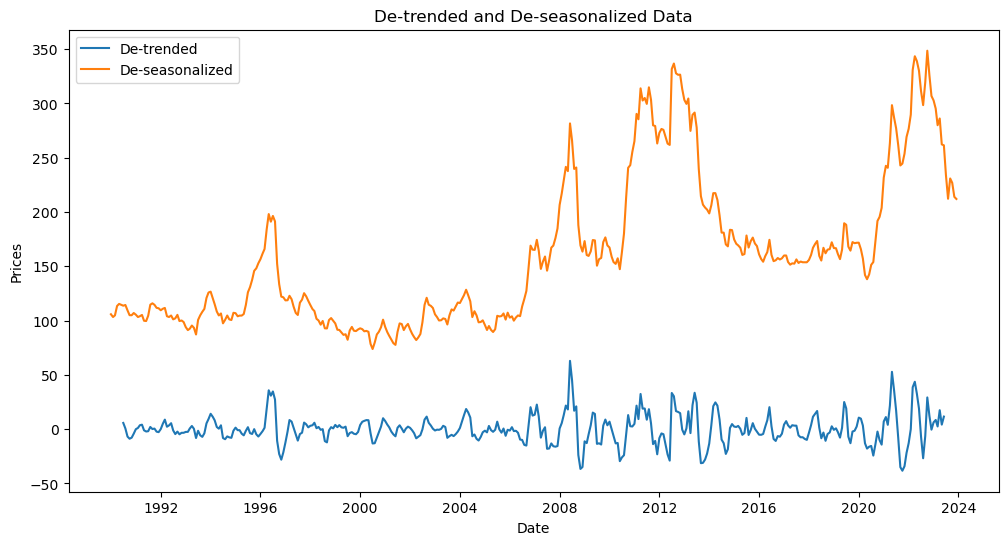

In [112]:
# Visualize de-trended and de-seasonalized data
plt.figure(figsize=(12, 6))
plt.plot(detrended, label='De-trended')
plt.plot(deseasonalized, label='De-seasonalized')
plt.legend(loc='upper left')
plt.title('De-trended and De-seasonalized Data')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.show()



In [113]:
#Check stationarity of de-seasonalized data and complete the code for printing stationary test for de-sesonalized data



ADF Statistic: -2.141626772579278
p-value: 0.2281088867856167
Critical Values: {'1%': -3.4471856790801514, '5%': -2.868960436182993, '10%': -2.5707229006220524}


In [114]:
# Check stationarity of de-trended data
stationarity_test(detrended.dropna())


ADF Statistic: -6.358622818938999
p-value: 2.5064569238392157e-08
Critical Values: {'1%': -3.4477224095888497, '5%': -2.869196333125208, '10%': -2.5708486586002604}


Infer the result

In the provided code below, the auto_arima function from the pmdarima library is used to automatically find the best ARIMA model (p, d, q) for your time series data. This function performs a grid search over multiple combinations of p, d, and q values and selects the model with the lowest Akaike Information Criterion (AIC).

In [115]:
df['Prices_diff'] =                   #transform the data - take first difference of the dataseries 'Prices': complete the code
print(df['Prices_diff'])              #print the differenced data

Date
1990-01-01          NaN
1990-02-01     0.393654
1990-03-01     3.543152
1990-04-01     8.661018
1990-05-01     2.755760
                ...    
2023-08-01   -27.596059
2023-09-01    16.171778
2023-10-01    -1.945148
2023-11-01   -12.862222
2023-12-01    -1.642328
Name: Prices_diff, Length: 408, dtype: float64
ADF Statistic: -4.490989995484387
p-value: 0.00020414416205125378
Critical Values: {'1%': -3.4471856790801514, '5%': -2.868960436182993, '10%': -2.5707229006220524}


In [ ]:
stationarity_test(df['Prices_diff'].dropna())

Explain the results. Can we proceed with arima foreasting?

In [116]:
df['Prices_diff'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Prices_diff'].dropna(inplace=True)
#You can check if a time series has NaN values using the isna() or isnull() method in Pandas. Here's an example:


has_nan = df['Prices_diff'].isna().any()

if has_nan:
    print("The 'Prices_diff' series has NaN values.")
else:
    print("The 'Prices_diff' series does not have NaN values.")


The 'Prices_diff' series has NaN values.


In [117]:


# Fill NaN values with the mean of the column
df['Prices_diff'].fillna(df['Prices_diff'].mean(), inplace=True)


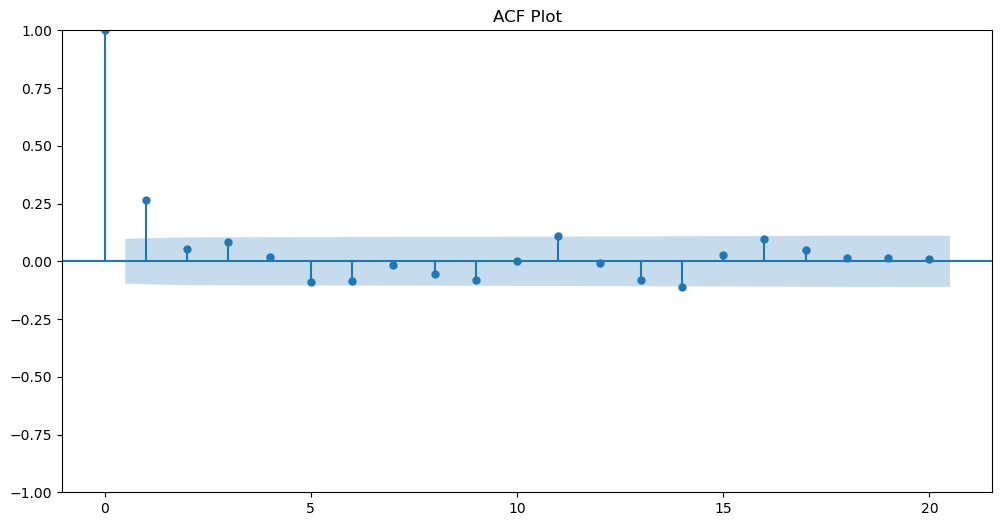

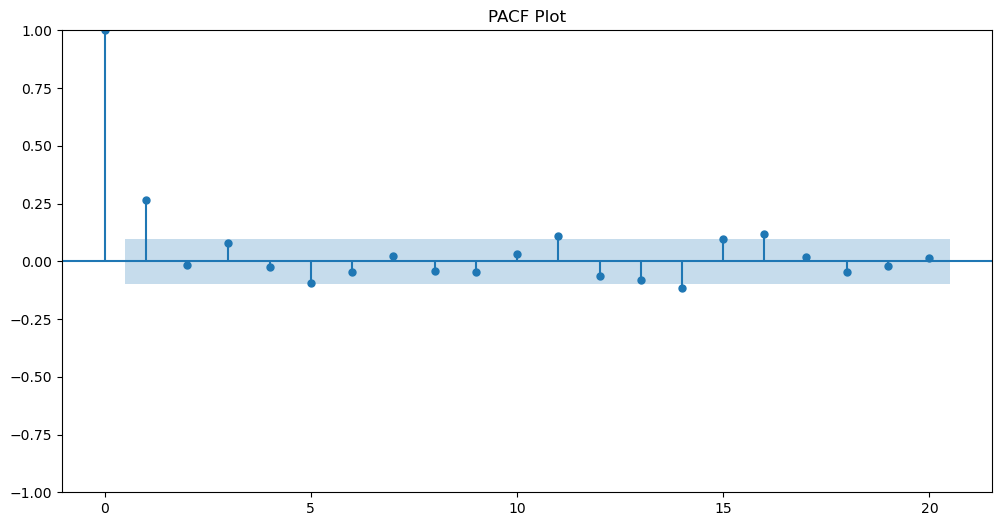

In [118]:
# ACF and PACF plots for determining ARIMA orders  #Complete the code for ACF and PACF PLOT and explain what you find in markdown below the plot
    


Fitting arima model (Method 1)

(0, 0, 1)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  408
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1553.786
Date:                Sun, 11 Feb 2024   AIC                           3111.572
Time:                        15:41:32   BIC                           3119.594
Sample:                    01-01-1990   HQIC                          3114.746
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2696      0.033      8.150      0.000       0.205       0.334
sigma2       118.9296      4.133     28.775      0.000     110.829     127.030
Ljung-Box (L1) (Q):                   0.01

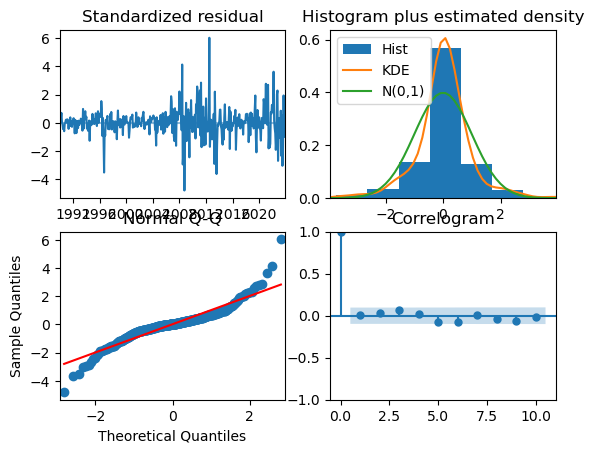

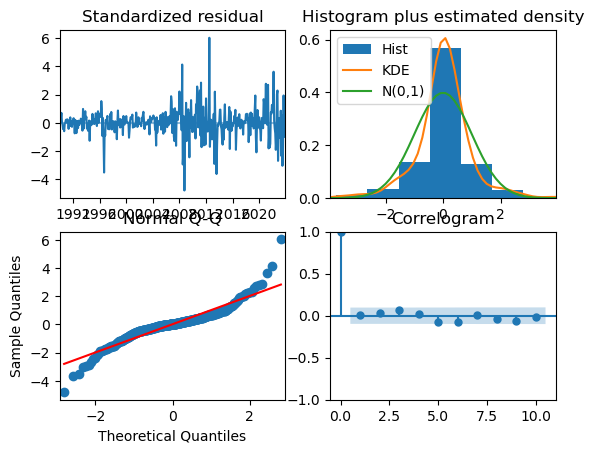

In [119]:
from pmdarima import auto_arima
import pandas as pd

# Assuming df is your time series dataframe with a datetime index and 'Prices' column
# Adjust the exogenous variables accordingly if needed

# Perform a grid search for the best ARIMA model on series "Prices_diff". Complete the code below:
model = 

# Display the best model's parameters
print(model.order)


# Fit the best model to the data
model.fit(df['Prices_diff'])

# Print the summary and diagnostic - Complete the two lines of code below for printing model summary and model diagnostics
#Explain what you find in markdown below the model fit and model diagnostics

In [122]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima

# Assuming df is your time series dataframe with a datetime index and 'Prices' column
# Adjust the exogenous variables accordingly if needed

# Assuming Prices_log_diff and model are already defined


# In-sample forecasting
in_sample_forecast = model.predict_in_sample()


# Out-of-sample forecasting
# Assuming you have future data in a DataFrame called df_future
n_periods = 10
forecast, conf_int = (steps=n_periods, return_conf_int=True)#complete the code


# Print or use the forecasts as needed
print("In-sample forecast:")
print(in_sample_forecast)

print("\nOut-of-sample forecast:")
print(forecast)


In-sample forecast:
1990-01-01    0.000000
1990-02-01    0.062673
1990-03-01    0.088788
1990-04-01    0.930887
1990-05-01    2.083816
                ...   
2023-08-01   -8.946177
2023-09-01   -5.027589
2023-10-01    5.714872
2023-11-01   -2.064969
2023-12-01   -2.910697
Freq: MS, Name: predicted_mean, Length: 408, dtype: float64

Out-of-sample forecast:
2024-01-01    0.341924
2024-02-01    0.000000
2024-03-01    0.000000
2024-04-01    0.000000
2024-05-01    0.000000
2024-06-01    0.000000
2024-07-01    0.000000
2024-08-01    0.000000
2024-09-01    0.000000
2024-10-01    0.000000
Freq: MS, dtype: float64


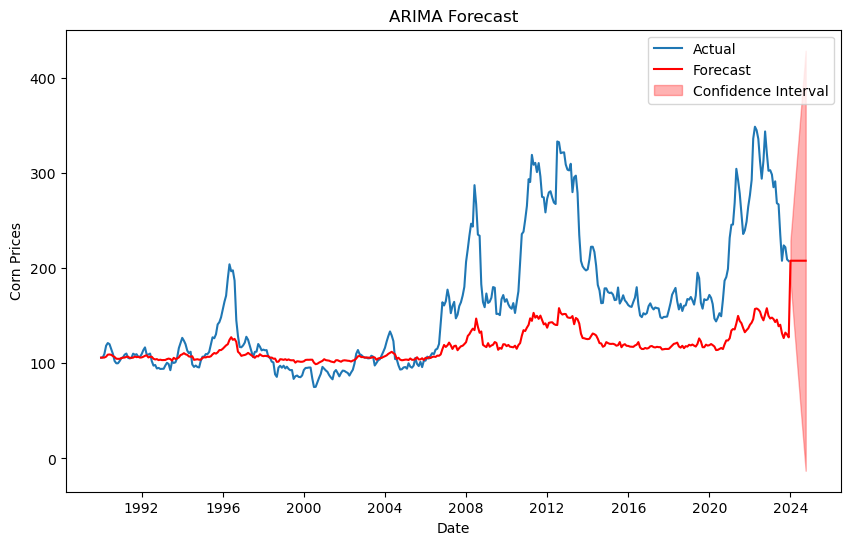

In [128]:
# Reverse the differencing for in-sample forecast
in_sample_forecast_actual = df['Prices'].iloc[0] + in_sample_forecast.cumsum()

# Reverse the differencing for out-of-sample forecast
out_of_sample_forecast_actual = df['Prices'].iloc[-1] + forecast.cumsum()

# Combine in-sample and out-of-sample forecasts
all_forecast_actual = pd.concat([in_sample_forecast_actual, out_of_sample_forecast_actual])

# Create a DataFrame for confidence intervals with correct indices
conf_int_actual = pd.DataFrame(conf_int, index=pd.date_range(df.index[-1], periods=n_periods + 1, freq='MS')[1:])

# Reverse the differencing for confidence intervals
conf_int_actual = df['Prices'].iloc[-1] + conf_int_actual.cumsum()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Prices'], label='Actual')
plt.plot(all_forecast_actual, label='Forecast', color='red')
plt.fill_between(conf_int_actual.index, conf_int_actual.iloc[:, 0], conf_int_actual.iloc[:, 1], color='red', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Corn Prices')
plt.legend()
plt.show()


EXPLAIN WHAT YOU FIND- IS YOUR FORECASTING PERFECT? IS THE MODEL YOU CHOOSE PERFECT? CAN YOU EXPLAIN WHY OR WHY NOT IT IS A PERFECT FORECAST

Summarize your findings